In [1]:
import pandas as pd
import plotly.express as px

In [2]:
train_image_paths_df = pd.read_csv('MURA-v1.1/train_image_paths.csv', header=None, names=['path'])
train_labeled_studies_df = pd.read_csv('MURA-v1.1/train_labeled_studies.csv', header=None, names=['path', 'label'])
valid_image_paths_df = pd.read_csv('MURA-v1.1/valid_image_paths.csv', header=None, names=['path'])
valid_labeled_studies_df = pd.read_csv('MURA-v1.1/valid_labeled_studies.csv', header=None, names=['path', 'label'])

In [3]:
train_image_paths_df.head()

path
0  MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1  MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2  MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3  MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4  MURA-v1.1/train/XR_SHOULDER/patient00002/study...

In [4]:
train_labeled_studies_df.head()

path  label
0  MURA-v1.1/train/XR_SHOULDER/patient00001/study...      1
1  MURA-v1.1/train/XR_SHOULDER/patient00002/study...      1
2  MURA-v1.1/train/XR_SHOULDER/patient00003/study...      1
3  MURA-v1.1/train/XR_SHOULDER/patient00004/study...      1
4  MURA-v1.1/train/XR_SHOULDER/patient00005/study...      1

In [5]:
train_image_paths_df.shape

(36808, 1)

In [6]:
train_labeled_studies_df.shape

(13457, 2)

In [7]:
studies_counts = train_labeled_studies_df['label'].value_counts()
studies_counts

label
0    8280
1    5177
Name: count, dtype: int64

In [8]:
fig = px.bar(x=studies_counts.index, y=list(studies_counts), width=600, height=500, labels={ 'x': 'Result', 'y': 'Count' })
fig.update_layout(
    xaxis = dict(
        labelalias='Count',
        tickmode='array',
        tickvals = [0, 1],
        ticktext = ['No', 'Yes']
    ),
    xaxis_title='Study Result',
    yaxis_title='Count',
    title='Study Results Counts'
)

In [9]:
train_labeled_studies_df['path'][0].split('/')

['MURA-v1.1', 'train', 'XR_SHOULDER', 'patient00001', 'study1_positive', '']

In [10]:
train_labeled_studies_df['path'].str.split('/').apply(lambda x: x[2:-1])

0        [XR_SHOULDER, patient00001, study1_positive]
1        [XR_SHOULDER, patient00002, study1_positive]
2        [XR_SHOULDER, patient00003, study1_positive]
3        [XR_SHOULDER, patient00004, study1_positive]
4        [XR_SHOULDER, patient00005, study1_positive]
                             ...                     
13452        [XR_HAND, patient11180, study1_negative]
13453        [XR_HAND, patient11181, study1_negative]
13454        [XR_HAND, patient11182, study1_negative]
13455        [XR_HAND, patient11183, study1_negative]
13456        [XR_HAND, patient11184, study1_negative]
Name: path, Length: 13457, dtype: object

In [11]:
train_labeled_studies_df[['part', 'patient_id', 'study_label']] = list(train_labeled_studies_df['path'].str.split('/').apply(lambda x: x[2:-1]))

In [12]:
train_labeled_studies_df

path  label         part  \
0      MURA-v1.1/train/XR_SHOULDER/patient00001/study...      1  XR_SHOULDER   
1      MURA-v1.1/train/XR_SHOULDER/patient00002/study...      1  XR_SHOULDER   
2      MURA-v1.1/train/XR_SHOULDER/patient00003/study...      1  XR_SHOULDER   
3      MURA-v1.1/train/XR_SHOULDER/patient00004/study...      1  XR_SHOULDER   
4      MURA-v1.1/train/XR_SHOULDER/patient00005/study...      1  XR_SHOULDER   
...                                                  ...    ...          ...   
13452  MURA-v1.1/train/XR_HAND/patient11180/study1_ne...      0      XR_HAND   
13453  MURA-v1.1/train/XR_HAND/patient11181/study1_ne...      0      XR_HAND   
13454  MURA-v1.1/train/XR_HAND/patient11182/study1_ne...      0      XR_HAND   
13455  MURA-v1.1/train/XR_HAND/patient11183/study1_ne...      0      XR_HAND   
13456  MURA-v1.1/train/XR_HAND/patient11184/study1_ne...      0      XR_HAND   

         patient_id      study_label  
0      patient00001  study1_positive  
1      patient00002  study1_positive  
2      patient00003  study1_positive  
3      patient00004  study1_positive  
4      patient00005  study1_positive  
...             ...              ...  
13452  patient11180  study1_negative  
13453  patient11181  study1_negative  
13454  patient11182  study1_negative  
13455  patient11183  study1_negative  
13456  patient11184  study1_negative  

[13457 rows x 5 columns]

In [13]:
train_labeled_studies_df.study_label.value_counts()

study_label
study1_negative    7838
study1_positive    5096
study2_negative     404
study2_positive      76
study3_negative      31
study4_negative       7
study3_positive       4
study4_positive       1
Name: count, dtype: int64

In [14]:
part_counts = train_labeled_studies_df.part.value_counts()
part_counts

part
XR_WRIST       3460
XR_SHOULDER    2821
XR_HAND        2018
XR_FINGER      1935
XR_ELBOW       1754
XR_FOREARM      877
XR_HUMERUS      592
Name: count, dtype: int64

In [15]:
fig = px.bar(x=part_counts.index, y=list(part_counts), width=600, height=500, labels={ 'x': 'Part', 'y': 'Count' })
fig.update_layout(
    xaxis_title='Study Parts',
    yaxis_title='Count',
    title='Study Parts Counts'
)

In [16]:
parts_grouped_counts = train_labeled_studies_df[['part', 'label', 'study_label']].groupby(['part', 'label']).count()
parts_grouped_counts

study_label
part        label             
XR_ELBOW    0             1094
            1              660
XR_FINGER   0             1280
            1              655
XR_FOREARM  0              590
            1              287
XR_HAND     0             1497
            1              521
XR_HUMERUS  0              321
            1              271
XR_SHOULDER 0             1364
            1             1457
XR_WRIST    0             2134
            1             1326

In [17]:
parts_grouped_counts = parts_grouped_counts.reset_index()
parts_grouped_counts['label'] = parts_grouped_counts.reset_index()['label'].apply(lambda x: 'Negative' if x == 0 else 'Positive')
parts_grouped_counts = parts_grouped_counts.rename({
    'label': 'Study Result', 'part': 'Part', 'study_label': 'Count'
}, axis=1)

In [18]:
parts_grouped_counts

Part Study Result  Count
0      XR_ELBOW     Negative   1094
1      XR_ELBOW     Positive    660
2     XR_FINGER     Negative   1280
3     XR_FINGER     Positive    655
4    XR_FOREARM     Negative    590
5    XR_FOREARM     Positive    287
6       XR_HAND     Negative   1497
7       XR_HAND     Positive    521
8    XR_HUMERUS     Negative    321
9    XR_HUMERUS     Positive    271
10  XR_SHOULDER     Negative   1364
11  XR_SHOULDER     Positive   1457
12     XR_WRIST     Negative   2134
13     XR_WRIST     Positive   1326

In [19]:
fig = px.bar(parts_grouped_counts, x='Part', y='Count', color='Study Result', width=700, height=500)
fig.update_layout(
    xaxis_title='Study Parts',
    yaxis_title='Count',
    title='Study Parts Counts'
)

---

In [20]:
valid_image_paths_df.head()

path
0  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4  MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...

In [21]:
valid_labeled_studies_df.head()

path  label
0  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...      1
1  MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...      1
2  MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...      1
3  MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...      1
4  MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...      1

In [22]:
valid_image_paths_df.shape

(3197, 1)

In [23]:
valid_labeled_studies_df.shape

(1199, 2)

In [24]:
studies_counts = valid_labeled_studies_df['label'].value_counts()
studies_counts

label
0    661
1    538
Name: count, dtype: int64

In [25]:
fig = px.bar(x=studies_counts.index, y=list(studies_counts), width=600, height=500, labels={ 'x': 'Result', 'y': 'Count' })
fig.update_layout(
    xaxis = dict(
        labelalias='Count',
        tickmode='array',
        tickvals = [0, 1],
        ticktext = ['No', 'Yes']
    ),
    xaxis_title='Study Result',
    yaxis_title='Count',
    title='Study Results Counts'
)

In [26]:
valid_labeled_studies_df['path'][0].split('/')

['MURA-v1.1', 'valid', 'XR_WRIST', 'patient11185', 'study1_positive', '']

In [27]:
valid_labeled_studies_df['path'].str.split('/').apply(lambda x: x[2:-1])

0        [XR_WRIST, patient11185, study1_positive]
1        [XR_WRIST, patient11186, study1_positive]
2        [XR_WRIST, patient11186, study2_positive]
3        [XR_WRIST, patient11186, study3_positive]
4        [XR_WRIST, patient11187, study1_positive]
                           ...                    
1194    [XR_FINGER, patient11965, study1_negative]
1195    [XR_FINGER, patient11855, study1_negative]
1196    [XR_FINGER, patient11966, study1_negative]
1197    [XR_FINGER, patient11967, study1_negative]
1198    [XR_FINGER, patient11738, study1_negative]
Name: path, Length: 1199, dtype: object

In [28]:
valid_labeled_studies_df[['part', 'patient_id', 'study_label']] = list(valid_labeled_studies_df['path'].str.split('/').apply(lambda x: x[2:-1]))

In [29]:
valid_labeled_studies_df

path  label       part  \
0     MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...      1   XR_WRIST   
1     MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...      1   XR_WRIST   
2     MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...      1   XR_WRIST   
3     MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...      1   XR_WRIST   
4     MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...      1   XR_WRIST   
...                                                 ...    ...        ...   
1194  MURA-v1.1/valid/XR_FINGER/patient11965/study1_...      0  XR_FINGER   
1195  MURA-v1.1/valid/XR_FINGER/patient11855/study1_...      0  XR_FINGER   
1196  MURA-v1.1/valid/XR_FINGER/patient11966/study1_...      0  XR_FINGER   
1197  MURA-v1.1/valid/XR_FINGER/patient11967/study1_...      0  XR_FINGER   
1198  MURA-v1.1/valid/XR_FINGER/patient11738/study1_...      0  XR_FINGER   

        patient_id      study_label  
0     patient11185  study1_positive  
1     patient11186  study1_positive  
2     patient11186  study2_positive  
3     patient11186  study3_positive  
4     patient11187  study1_positive  
...            ...              ...  
1194  patient11965  study1_negative  
1195  patient11855  study1_negative  
1196  patient11966  study1_negative  
1197  patient11967  study1_negative  
1198  patient11738  study1_negative  

[1199 rows x 5 columns]

In [30]:
valid_labeled_studies_df.study_label.value_counts()

study_label
study1_negative    592
study1_positive    526
study2_negative     59
study2_positive     11
study3_negative      9
study3_positive      1
study4_negative      1
Name: count, dtype: int64

In [31]:
part_counts = valid_labeled_studies_df.part.value_counts()
part_counts

part
XR_WRIST       237
XR_SHOULDER    194
XR_FINGER      175
XR_HAND        167
XR_ELBOW       158
XR_HUMERUS     135
XR_FOREARM     133
Name: count, dtype: int64

In [32]:
fig = px.bar(x=part_counts.index, y=list(part_counts), width=600, height=500, labels={ 'x': 'Part', 'y': 'Count' })
fig.update_layout(
    xaxis_title='Study Parts',
    yaxis_title='Count',
    title='Study Parts Counts'
)

In [33]:
parts_grouped_counts = valid_labeled_studies_df[['part', 'label', 'study_label']].groupby(['part', 'label']).count()
parts_grouped_counts

study_label
part        label             
XR_ELBOW    0               92
            1               66
XR_FINGER   0               92
            1               83
XR_FOREARM  0               69
            1               64
XR_HAND     0              101
            1               66
XR_HUMERUS  0               68
            1               67
XR_SHOULDER 0               99
            1               95
XR_WRIST    0              140
            1               97

In [34]:
parts_grouped_counts = parts_grouped_counts.reset_index()
parts_grouped_counts['label'] = parts_grouped_counts.reset_index()['label'].apply(lambda x: 'Negative' if x == 0 else 'Positive')
parts_grouped_counts = parts_grouped_counts.rename({
    'label': 'Study Result', 'part': 'Part', 'study_label': 'Count'
}, axis=1)

In [35]:
fig = px.bar(parts_grouped_counts, x='Part', y='Count', color='Study Result', width=700, height=500)
fig.update_layout(
    xaxis_title='Study Parts',
    yaxis_title='Count',
    title='Study Parts Counts'
)

---

In [36]:
from matplotlib import pyplot as plt
from skimage import io

In [37]:
train = pd.read_csv('processed/train.csv')

In [38]:
train.head()

path         part  label
0  MURA-v1.1/train/XR_SHOULDER/patient00001/study...  XR_SHOULDER      1
1  MURA-v1.1/train/XR_SHOULDER/patient00001/study...  XR_SHOULDER      1
2  MURA-v1.1/train/XR_SHOULDER/patient00001/study...  XR_SHOULDER      1
3  MURA-v1.1/train/XR_SHOULDER/patient00002/study...  XR_SHOULDER      1
4  MURA-v1.1/train/XR_SHOULDER/patient00002/study...  XR_SHOULDER      1

In [39]:
sample = train.sample(1).reset_index()
path = sample['path'][0]
part = sample['part']
label = sample['label']
img = io.imread(path)
fig = px.imshow(img, color_continuous_scale='gray', labels={})
fig.update_layout(coloraxis_showscale=False)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()

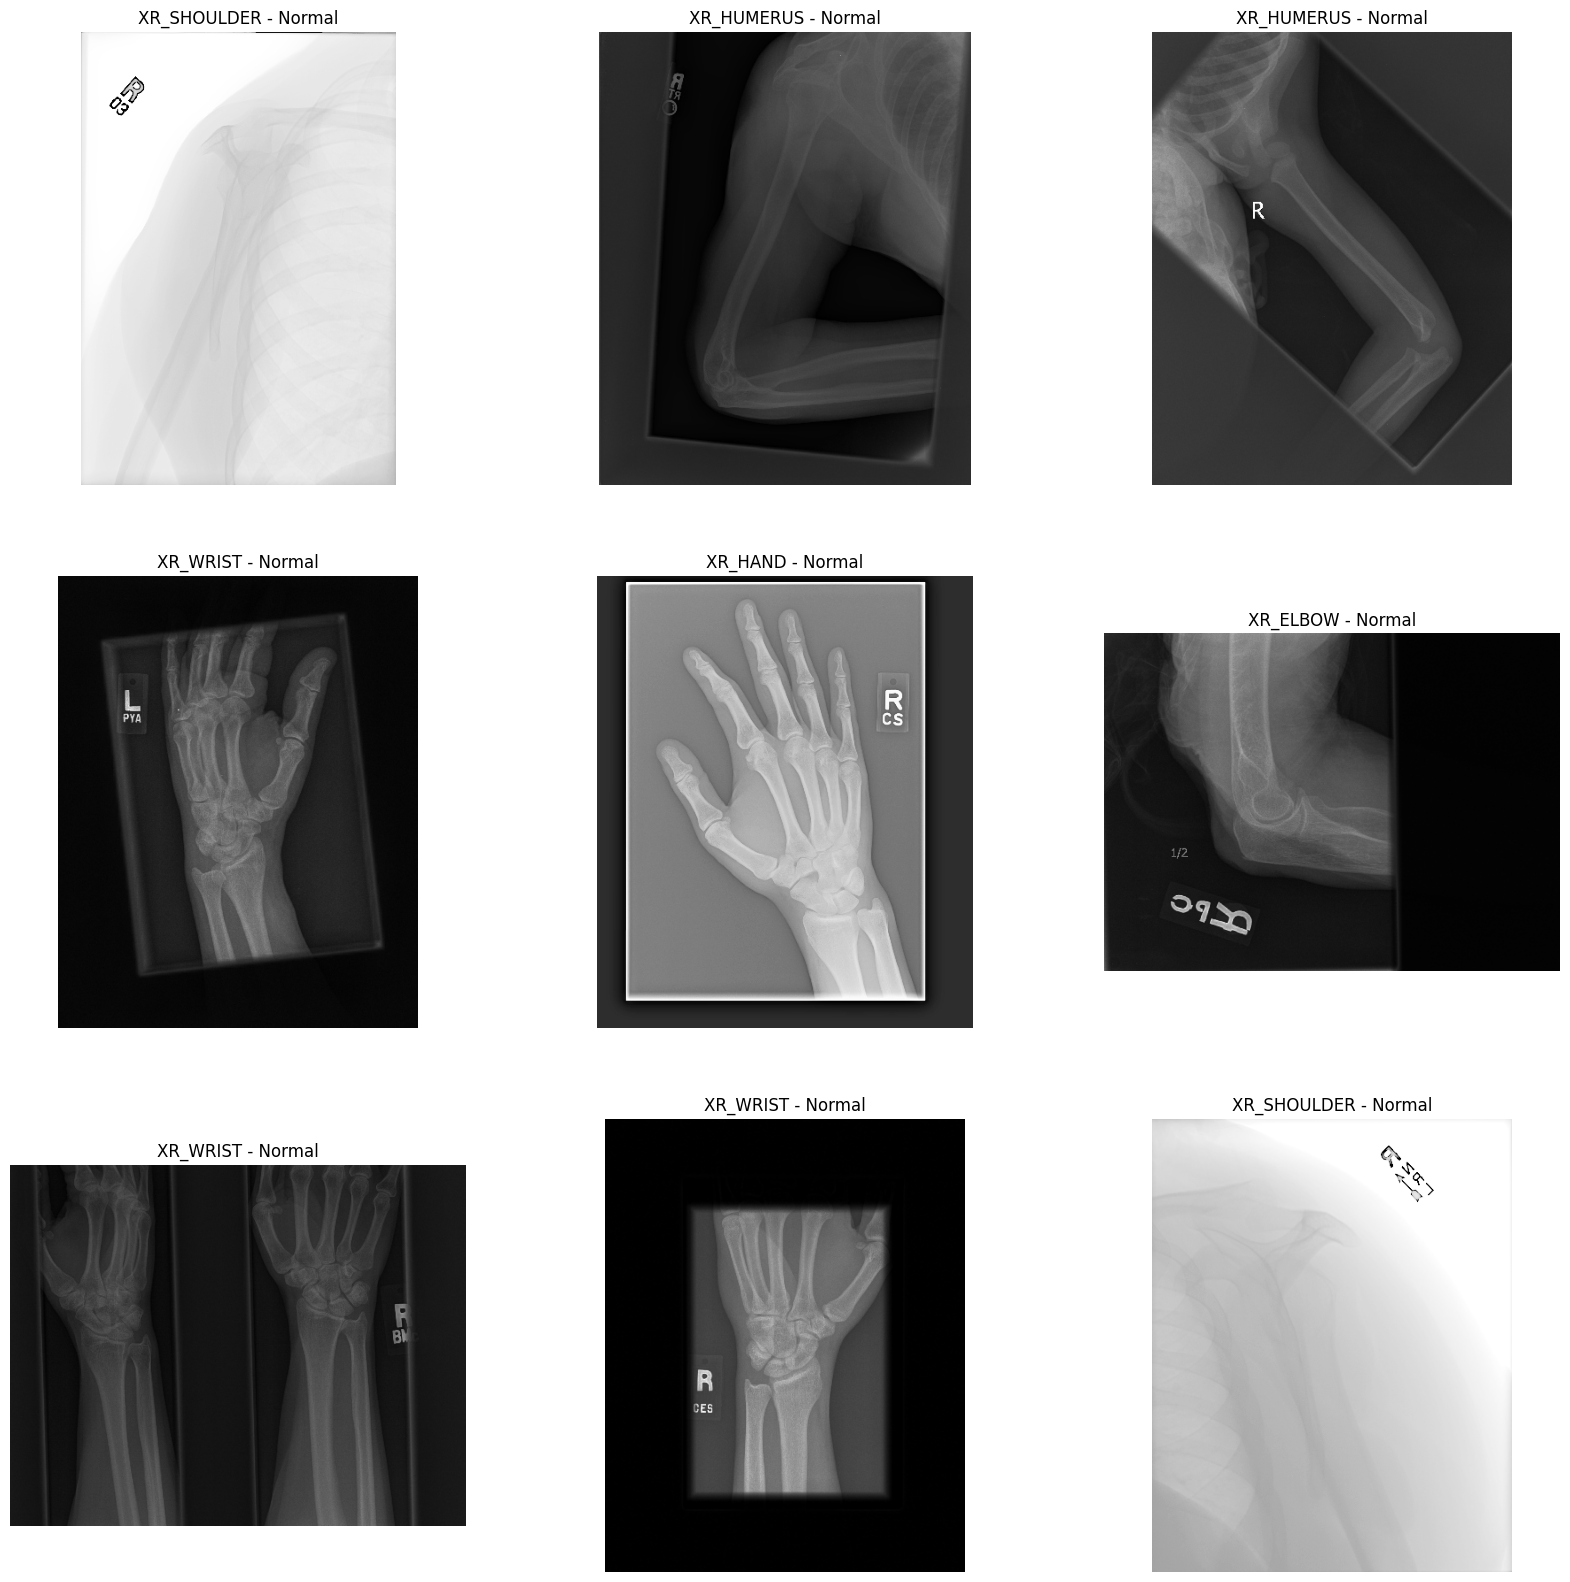

In [40]:
plt.figure(figsize=(20, 20))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    sample = train[train['label'] == 0].sample(1).reset_index()
    path = sample['path'][0]
    part = sample['part'][0]
    label = sample['label'][0]
    img = io.imread(path)
    axis = plt.imshow(img, cmap='Grays')
    plt.title(f'{part} - Normal')
    plt.axis('off')

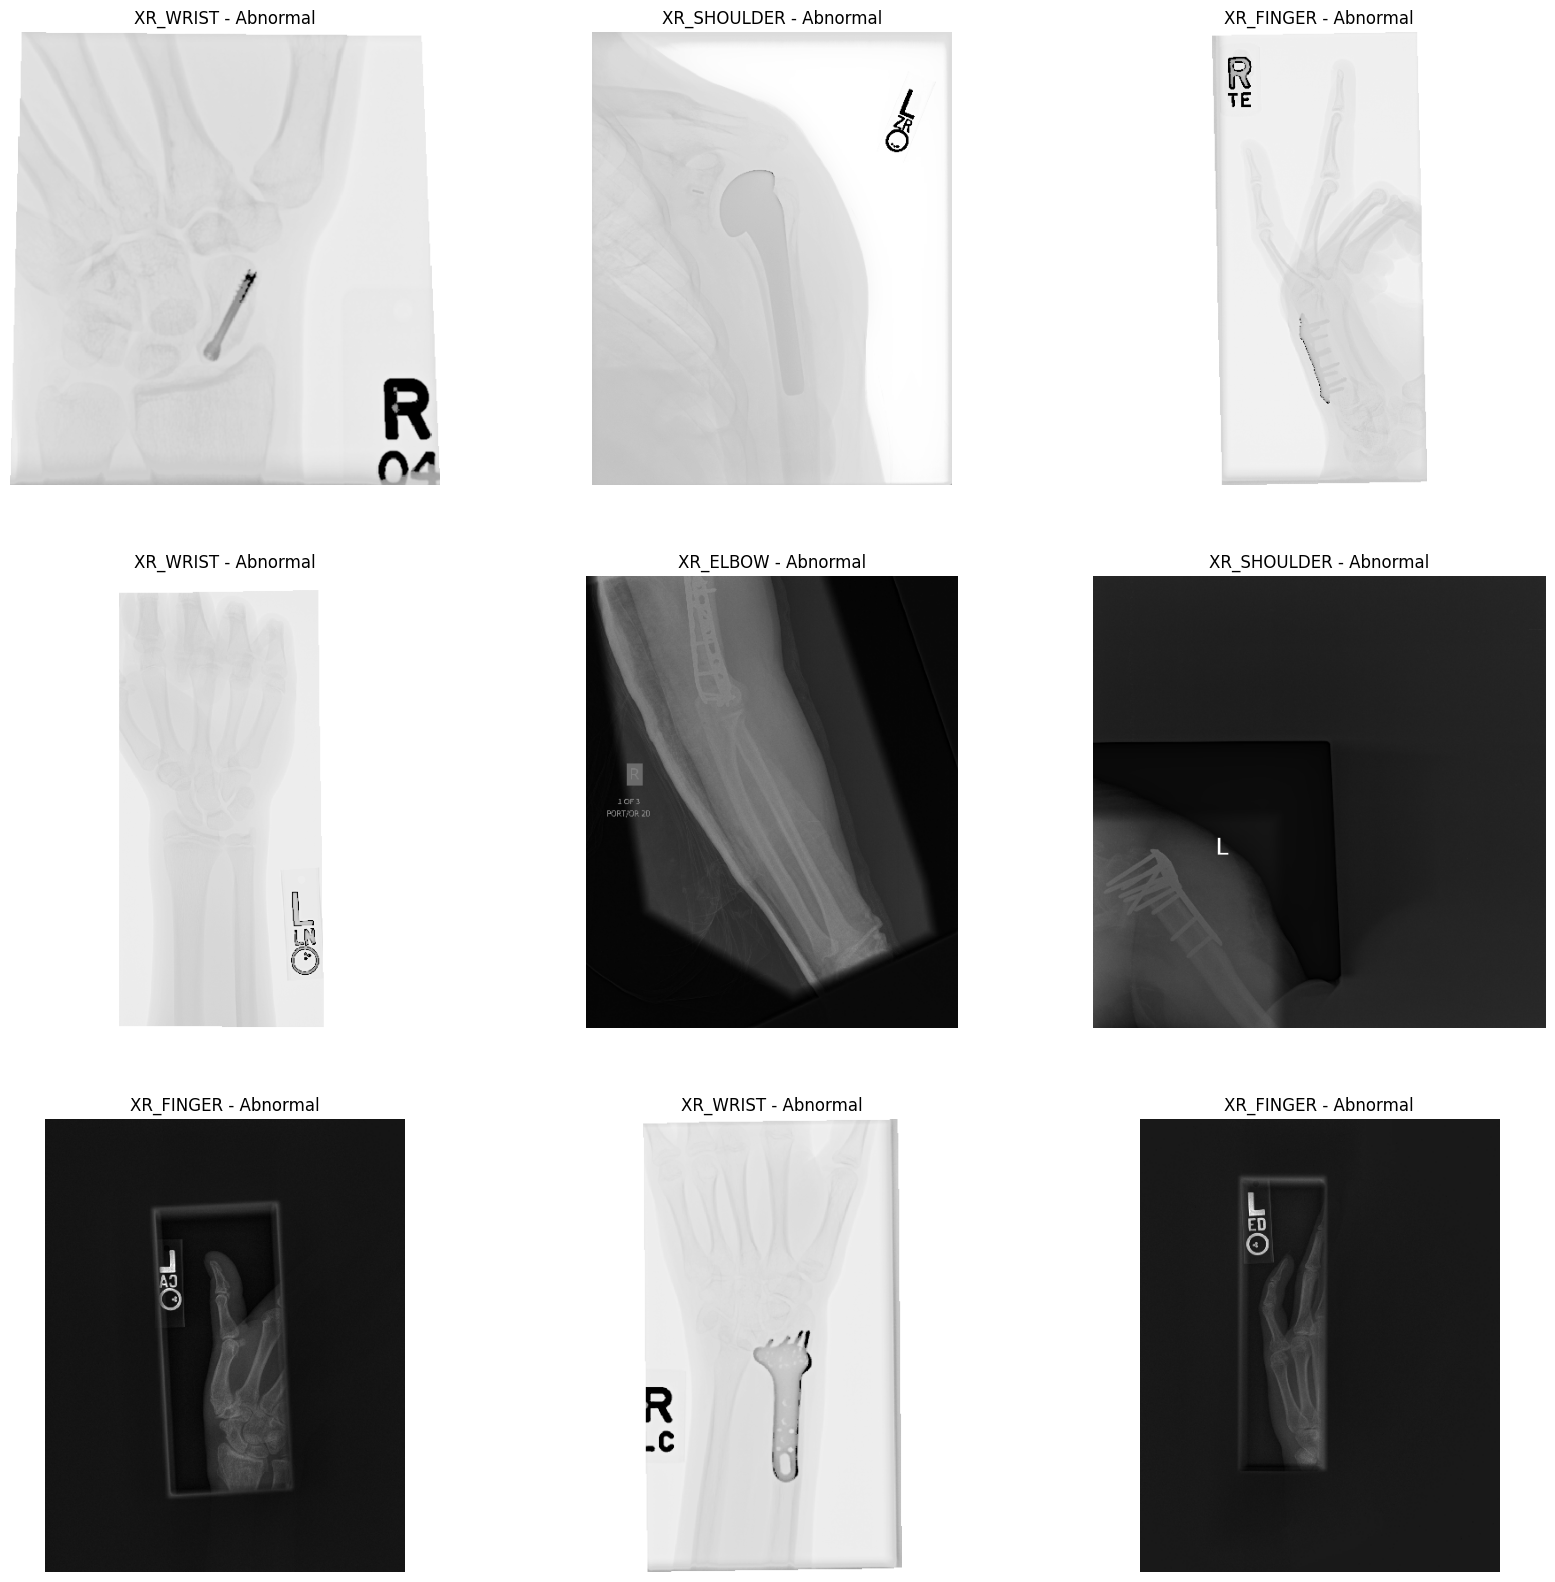

In [41]:
plt.figure(figsize=(20, 20))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    sample = train[train['label'] == 1].sample(1).reset_index()
    path = sample['path'][0]
    part = sample['part'][0]
    label = sample['label'][0]
    img = io.imread(path)
    axis = plt.imshow(img, cmap='Grays')
    plt.title(f'{part} - Abnormal')
    plt.axis('off')